<a href="https://colab.research.google.com/github/HaticeTuran/Data-Analysis-Term-Project/blob/main/INF506_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Top Hits Spotify from 2000-2019** **bold text**

Autorinnen 
Hatice Turan 190503011
Ceyda Baloğlu 170503036

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import time
import seaborn as sns

In [ ]:
path = './songs_normalize.csv'

In [ ]:
df = pd.read_csv(path)
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


Şarkıcı isimleri ve şarkı sayıları basıldı 

In [ ]:
df['artist'].value_counts()

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: artist, Length: 835, dtype: int64

Şarkı süreleri milisaniyeden dakika:saniye:milisaniyeye çevirildi


In [ ]:
def convert_from_ms( milliseconds ): 
	seconds, milliseconds = divmod(milliseconds,1000) 
	minutes, seconds = divmod(seconds, 60) 
  
	return str(minutes) + ":"+ str(seconds) + "."+ str(milliseconds)


In [ ]:
duration_min = []
for i in df['duration_ms']:
  converted_time = convert_from_ms(i)
  datetime_object = datetime.strptime(converted_time, '%M:%S.%f').time()
  duration_min.append(datetime_object )

df.insert(df.columns.get_loc("duration_ms"),"duration_min",duration_min)
df

,artist,song,duration_min,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,00:03:31.160000,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,00:02:47.660000,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,00:04:10.546000,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,00:03:44.493000,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,00:03:20.560000,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,00:03:01.260000,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,00:02:58.426000,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,00:03:20.593000,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),00:02:51.290000,171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


Text(0, 0.5, 'Danceability')

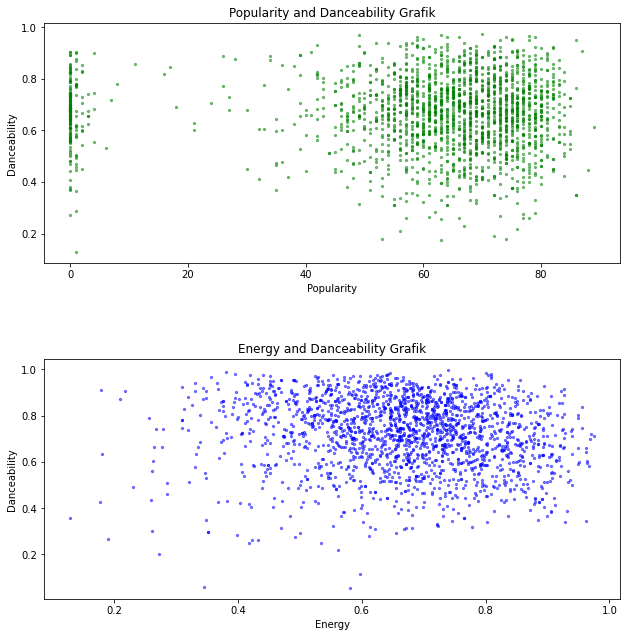

In [ ]:
fig, axes = plt.subplots(2 , figsize=(10,10))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
#print(axes)
#Erste Grafik 
axes[0].scatter (df.popularity,df.danceability,alpha=0.5 , s=5 ,color ="green" )
axes[0].set_title("Popularity and Danceability Grafik")
axes[0].set_xlabel("Popularity")
axes[0].set_ylabel("Danceability")
#Zweite Grafik
axes[1].scatter (df.danceability,df.energy,alpha=0.5 , s=5,color ="blue")
axes[1].set_title("Energy and Danceability Grafik")
axes[1].set_xlabel("Energy")
axes[1].set_ylabel("Danceability")




Combine two attributes 


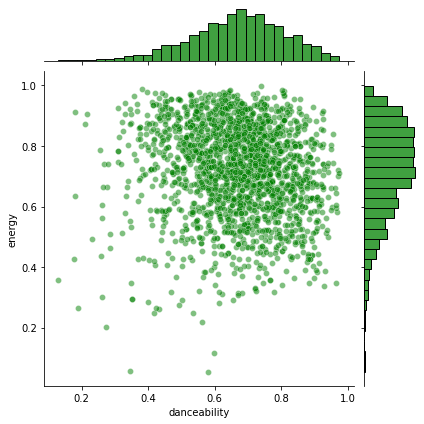

In [313]:
sns.jointplot(x = 'danceability', y = 'energy', data = df, color= "Green", alpha=.5)

Popularity değeri 85 den büyük olan 

In [ ]:
data =  df[df["popularity"] > 80]
data

,artist,song,duration_min,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
6,Eminem,The Real Slim Shady,00:04:44.200000,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
19,Dr. Dre,The Next Episode,00:02:41.506000,161506,True,1999,82,0.922,0.909,10,-2.429,0,0.2700,0.02810,0.000000,0.0856,0.309,95.295,hip hop
20,Linkin Park,In the End,00:03:36.880000,216880,False,2000,83,0.556,0.864,3,-5.870,0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,"rock, metal"
102,Eminem,Stan,00:06:44.106000,404106,True,2000,83,0.780,0.768,6,-4.325,0,0.2380,0.03710,0.000002,0.5180,0.507,80.063,hip hop
130,Outkast,Ms. Jackson,00:04:30.506000,270506,True,2000,82,0.843,0.806,4,-5.946,0,0.2690,0.14300,0.000000,0.0771,0.613,94.948,"hip hop, pop"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,Alec Benjamin,Let Me Down Slowly,00:02:49.353000,169353,False,2018,82,0.652,0.557,1,-5.714,0,0.0318,0.74000,0.000000,0.1240,0.483,150.073,"rock, pop, Dance/Electronic"
1921,Travis Scott,SICKO MODE,00:05:12.820000,312820,True,2018,81,0.834,0.730,8,-3.714,1,0.2220,0.00513,0.000000,0.1240,0.446,155.008,"hip hop, Dance/Electronic"
1929,Billie Eilish,lovely (with Khalid),00:03:20.185000,200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1960,Bad Bunny,Callaita,00:04:10.533000,250533,True,2019,81,0.610,0.624,2,-4.773,1,0.3090,0.60000,0.000002,0.2430,0.244,176.169,latin


[Text(0.5, 1.0, 'Energy and Danceability Grafik'),
 Text(0.5, 0, 'Energy'),
 Text(0, 0.5, 'Danceability')]

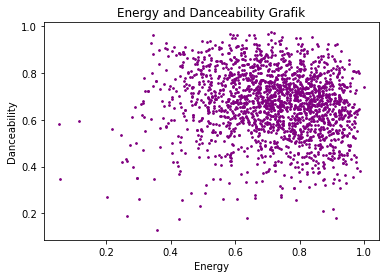

In [ ]:
#fig = plt.figure(figsize=(5,5))
plt.scatter(df['energy'], df["danceability"], s=3, c="Purple") 
plt.gca().update(dict(title='Energy and Danceability Grafik', xlabel='Energy', ylabel='Danceability'))


[Text(0.5, 1.0, 'Popularity and Energy Grafik'),
 Text(0.5, 0, 'Popularity'),
 Text(0, 0.5, 'Energy')]

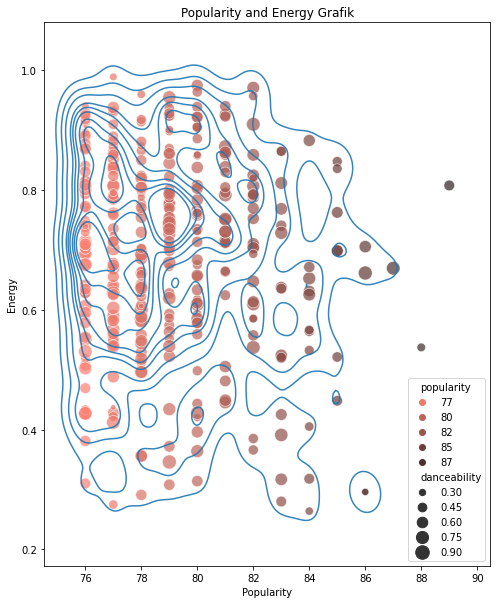

In [ ]:
fig2 = plt.figure(figsize=(8,10))
p = sns.scatterplot(data=df[ df.popularity >75], x="popularity",y="energy", size="danceability", sizes=(20,200), alpha= .7, 
                    hue = 'popularity', palette='dark:salmon_r')
sns.kdeplot(data=df[ df.popularity >75], x="popularity",y="energy", bw_adjust=.5, alpha =.9)

plt.gca().update(dict(title='Popularity and Energy Grafik', xlabel='Popularity', ylabel='Energy'))

In [ ]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000
